In [1]:
#1 Get a list of tuples. Write a function to sort the list 
# by second value. Do not use existing functions. 
# Example input: [(3,0), (0,10), (2,1), (5,3)] 
# Example output: [(3,0),(2,1),(5,3),(0,10)] 
def sort(l1):
    for i in range(len(l1)):
        for j in range(len(l1)-i-1):
            if l1[j][1]>l1[j+1][1]:
                l1[j],l1[j+1]=l1[j+1],l1[j]
    return l1
n=int(input('Enter size of list : '))
l=[]
for i in range(n):
    l.append(tuple(map(int,input().split())))
print(sort(l))

Enter size of list : 4
3 0
0 10
2 1
5 3
[(3, 0), (2, 1), (5, 3), (0, 10)]


In [2]:
#4 Given the coordinates of vertices (x,y) of an equilateral triangle, calculate circumcenter.
from sympy import symbols, Eq, solve
x, y = symbols('x y')
x1, y1, x2, y2, x3, y3 = map(float, input().split())
mid_pt1 = list([(x2+x3)/2, (y2+y3)/2])
mid_pt2 = list([(x1+x3)/2, (y1+y3)/2])
m1 = (y1-mid_pt1[1])/(x1-mid_pt1[0])
m2 = (y2-mid_pt2[1])/(x2-mid_pt2[0])
eq1 = Eq(y-y2-m2*x+m2*x2, 0)
eq2 = Eq(y-y1-m1*x+m1*x1, 0)
center = solve((eq1, eq2), (x, y))
print(center)

0 0 1 0 0.5 0.866
{x: 0.500000000000000, y: 0.288666666666667}


Enter vertices of equilateral triangle - 0.5 0.866 0 0 1 0
Enter N value - 3
Triangle #1: [0.0, 0.0] [0.25, 0.0] [0.125000000000000, 0.216500000000000] 
Triangle #2: [0.25, 0.0] [0.5, 0.0] [0.375000000000000, 0.216500000000000] 
Triangle #3: [0.5, 0.0] [0.75, 0.0] [0.625000000000000, 0.216500000000000] 
Triangle #4: [0.75, 0.0] [1.0, 0.0] [0.875000000000000, 0.216500000000000] 
Triangle #5: [0.125000000000000, 0.216500000000000] [0.375000000000000, 0.216500000000000] [0.250000000000000, 0.0] 
Triangle #6: [0.125000000000000, 0.216500000000000] [0.375000000000000, 0.216500000000000] [0.250000000000000, 0.433000000000000] 
Triangle #7: [0.375000000000000, 0.216500000000000] [0.625000000000000, 0.216500000000000] [0.500000000000000, 0.0] 
Triangle #8: [0.375000000000000, 0.216500000000000] [0.625000000000000, 0.216500000000000] [0.500000000000000, 0.433000000000000] 
Triangle #9: [0.625000000000000, 0.216500000000000] [0.875000000000000, 0.216500000000000] [0.750000000000000, 0.0] 
Triang

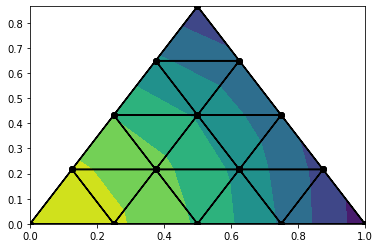

In [3]:
#5 Imagine an equilateral triangle, with vertices (x1,y1), (x2,y2), (x3,y3). 
# Suppose you divide the equilateral into smaller but equal sized equilateral triangles, 
# with "N" vertices on each side. Write a program find the coordinates of the inner triangles. 
# If possible plot the results using matplotlib.
from sympy import symbols, Eq, solve
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import numpy as np
import math


def slope(x1, y1, x2, y2):
    m = None
    b = y1-y2
    a = x1-x2
    if a != 0:
        m = b/a
    return m


def third_point(x1, y1, x2, y2):
    global a
    eq1 = Eq(pow(x-x1, 2)+pow(y-y1, 2)-pow(a/(n+1), 2), 0)
    eq2 = Eq(pow(x-x2, 2)+pow(y-y2, 2)-pow(a/(n+1), 2), 0)
    r = solve((eq1, eq2), (x, y))
    return r


def check(x1, y1, x, y):
    global x2, y2, x3, y3
    r = (y1-y)*(x3-x2)-(y3-y2)*(x1-x)
    if r < 0:
        return "-ve"
    else:
        return "+ve"


x, y = symbols('x y')
x1, y1, x2, y2, x3, y3 = map(float, input(
    "Enter vertices of equilateral triangle - ").split())
n = int(input("Enter N value - "))
c = check(x1, y1, x2, y2)
a = math.sqrt(pow((x1-x2), 2)+pow((y1-y2), 2))
l = [[x2, y2]]
result = []
p = 1
q = n
for i in range(n):
    l1 = [((p*x3)+(q*x2))/(p+q), ((p*y3)+(q*y2))/(p+q)]
    l.append(l1)
    p = p+1
    q = q-1
l.append([x3, y3])
l1 = []
for i in range(len(l)-1):
    d = third_point(l[i][0], l[i][1], l[i+1][0], l[i+1][1])
    s = check(d[0][0], d[0][1], x2, y2)
    if c == "+ve" and s == "+ve":
        l1.append([d[0][0], d[0][1]])
        result.append(
            [[l[i][0], l[i][1]], [l[i+1][0], l[i+1][1]], [d[0][0], d[0][1]]])
    elif c == "-ve" and s == "-ve":
        l1.append([d[0][0], d[0][1]])
        result.append(
            [[l[i][0], l[i][1]], [l[i+1][0], l[i+1][1]], [d[0][0], d[0][1]]])
    else:
        l1.append([d[1][0], d[1][1]])
        result.append(
            [[l[i][0], l[i][1]], [l[i+1][0], l[i+1][1]], [d[1][0], d[1][1]]])
for i in range(n):
    l = []
    for i in range(len(l1)-1):
        d = third_point(l1[i][0], l1[i][1], l1[i+1][0], l1[i+1][1])
        s = check(d[0][0], d[0][1], l1[i][0], l1[i][1])
        if c == "+ve" and s == "+ve":
            l.append([d[0][0], d[0][1]])
        elif c == "-ve" and s == "-ve":
            l.append([d[0][0], d[0][1]])
        else:
            l.append([d[1][0], d[1][1]])
        result.append(
            [[l1[i][0], l1[i][1]], [l1[i+1][0], l1[i+1][1]], [d[0][0], d[0][1]]])
        result.append(
            [[l1[i][0], l1[i][1]], [l1[i+1][0], l1[i+1][1]], [d[1][0], d[1][1]]])
    l1 = []
    l1.extend(l)
lx = []
ly = []
for i in range(len(result)):
    print("Triangle #{}".format(i+1), end=": ")
    for j in result[i]:
        print(j, end=" ")
        lx.append(j[0])
        ly.append(j[1])
    print()
lx.extend([x1, x2, x3])
ly.extend([y1, y2, y3])
tri = [[i, i+1, i+2] for i in range(0, len(lx), 3)]
x = np.asarray(lx, dtype=float)
y = np.asarray(ly, dtype=float)
triang = mtri.Triangulation(x, y, tri)
z = np.cos(1.5 * x) * np.cos(1.5 * y)
plt.tricontourf(triang, z)
plt.triplot(triang, 'ko-')
plt.show()